# CICIDS2017 - Introduction

The CICIDS2017 dataset provides extensive network traffic data designed for developing and assessing intrusion detection systems. It aims to realistically reflect modern network behavior and contains more than 2.8 million captured packets collected over seven days in a real operational environment. The dataset includes both normal traffic and seven distinct attack types: Brute Force, Heartbleed, Botnet, DoS, DDoS, Web Attack, and Infiltration. Its class distribution is highly unbalanced - most entries are labeled as Benign, while the attack categories make up only a small portion of the data. In total, the dataset consists of 2,830,743 rows and 79 columns, with 78 numerical features and one categorical label column.

## Exploratory Data Analysis

In this notebook, we will explore the dataset in depth. This includes examining the distributions of individual features, identifying correlations, and analyzing other statistical characteristics. Key observations, explanations, and interpretations will be provided where appropriate.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Own modules
from dataprepper import DataPrepper

In [2]:
# Import all datasets
d1 = pd.read_csv('../../../data/CICIDS2017/C1.csv')
d2 = pd.read_csv('../../../data/CICIDS2017/C2.csv')
d3 = pd.read_csv('../../../data/CICIDS2017/C3.csv')
d4 = pd.read_csv('../../../data/CICIDS2017/C4.csv')
d5 = pd.read_csv('../../../data/CICIDS2017/C5.csv')
d6 = pd.read_csv('../../../data/CICIDS2017/C6.csv')
d7 = pd.read_csv('../../../data/CICIDS2017/C7.csv')
d8 = pd.read_csv('../../../data/CICIDS2017/C8.csv')

In [4]:
# check data dimensions
dataframes = [d1, d2, d3, d4, d5, d6, d7, d8]
print('=== Data dimensions: ===')
for i, data in enumerate(dataframes, start = 1):
  rows, cols = data.shape
  print(f'd{i} -> {rows} rows, {cols} columns')

=== Data dimensions: ===
d1 -> 225745 rows, 79 columns
d2 -> 286467 rows, 79 columns
d3 -> 191033 rows, 79 columns
d4 -> 529918 rows, 79 columns
d5 -> 288602 rows, 79 columns
d6 -> 170366 rows, 79 columns
d7 -> 445909 rows, 79 columns
d8 -> 692703 rows, 79 columns


In [16]:
# check if all datasets have the same columns
mark = True
ref = list(dataframes[0].columns)
for df in dataframes[1:]:
    if list(df.columns) != ref:
        mark = False
        break

print(f'All datasets have the same columns: {mark}')

All datasets have the same columns: True


In [5]:
# Concatenate all dataframes (if columns are the same)
concatenated_df = pd.concat(dataframes, ignore_index=True)

# create DataPrepper instance; all further EDA will be done on the combined dataset
data = DataPrepper(df=concatenated_df, target_col='Label', name="CICIDS2017 Combined Dataset")
data.inspect()


=== CICIDS2017 Combined Dataset: SHAPE ===
(2830743, 79)

=== CICIDS2017 Combined Dataset: HEAD ===
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Pac

c:\Users\lukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\lukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [6]:
# Clean up memory
for d in dataframes: del d
del concatenated_df

**Handle Infinity Values** <br>
Since infinity values cannot be meaningfully processed or used in calculations, we convert them to NaN and treat them in the same way as the other missing entries.

In [7]:
# # Drop duplicates (no additional info lost)
data.df.drop_duplicates(inplace = True)

# Handle infinite values
print(f'Missing values before handling infinitives: {data.df.isna().sum().sum()}')
data.df.replace([np.inf, -np.inf], np.nan, inplace = True)
print(f'Missing values after handling infinitives: {data.df.isna().sum().sum()}')

Missing values before handling infinitives: 353
Missing values after handling infinitives: 3128


We add a simple boolean column to distinguish between attack and not attack, enabling binary classification.
This value is derived directly from the Label column: if the entry is BENIGN, we assign 0; otherwise, we assign 1.

In [8]:
data.df["anomaly_bool"] = data.df["Label"].apply(
    lambda x: 0 if x == "BENIGN" else 1
)

In [38]:
# Inspect missing values visually
data.inspect_boxplot(data = data.df, x = "Flow Bytes/s", y = None, title = "Boxplot of Flow Bytes/s")
data.inspect_histograms(df = data.df, column = "Flow Bytes/s")
print('Median of Flow Bytes/s: ', data.df['Flow Bytes/s'].median())

KeyboardInterrupt: 

In [ ]:
data.inspect_boxplot(data = data.df, x = "Flow Packets/s", y = None, title = "Boxplot of Flow Packets/s")
data.inspect_histograms(df = data.df, column = "Flow Packets/s")
print('Median of Flow Packets/s: ', data.df['Flow Packets/s'].median())

**Handle missing values**<br>
Since only a very small fraction of rows is affected by missing values (0.06%), removing them would be a valid option.
However, based on the boxplots and histograms, the feature distributions are clearly non-normal and include extreme values and numerous outliers.
For this reason, we fill the missing entries using the median of each feature. The median is robust to outliers and provides a representative central value for skewed distributions.

In [9]:
# Filling missing values with median
_ = data.missing_median(col = 'Flow Bytes/s')
_ = data.missing_median(col = 'Flow Packets/s')

Replaced 1564 numeric NaN values in "Flow Bytes/s" with median 3715.0378579999997.
Replaced 1564 numeric NaN values in "Flow Packets/s" with median 69.742244285.


In [ ]:
data.inspect()

In [10]:
# Inspect target variable distribution
print(data.df['Label'].unique())
print("==========================================================")
print(data.df['Label'].value_counts())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']
Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


Here we need to decide whether to keep the attack labels in their detailed form or group them into broader categories. Taking Web Attack as an example: the smallest subgroup (Web Attack � SQL Injection) contains only 11 rows in the entire dataset. With so few samples, it is very unlikely that a model can learn meaningful patterns to accurately recognize this specific attack type. Even the overall Web Attack class is comparatively small, which makes detailed classification even more challenging.
For this reason, we combined all subtypes of web attacks into a single category, increasing the chance that a model can at least reliably detect a general web-based attack.
The same argument applies to the other attack groups with similarly small subclasses.

In [11]:
# Map detailed attack labels to broader categories for easier analysis
attack_types = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'PortScan',
    'FTP-Patator': 'BruteForce',
    'SSH-Patator': 'BruteForce',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'WebAttack',
    'Web Attack � XSS': 'WebAttack',
    'Web Attack � Sql Injection': 'WebAttack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Create a new column for broader attack types
data.df['Attack Type'] = data.df['Label'].map(attack_types)
data.df['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
PortScan          90819
BruteForce         9152
WebAttack          2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [12]:
# Drop the original 'Label' column as it's no longer needed
data.df.drop('Label', axis = 1, inplace = True)

In this situation, several encoding strategies can be considered for representing the attack categories:

- LabelEncoder
- OneHotEncoder
- OrdinalEncoder

OrdinalEncoder can be ruled out immediately, as the attack types do not follow any natural ordering. Using OneHotEncoder would also be inefficient: although it would introduce only eight additional columns, the dataset contains over two million rows, resulting in a large number of extra data cells that provide no real benefit.

To avoid this unnecessary overhead, we use LabelEncoder. However, it is important to keep in mind that the assigned numeric values have no ordinal meaning - they are simply identifiers for the different classes.

In [13]:
# Encode attack types to numerical values (for e.g. correlation analysis)
le = LabelEncoder()
data.df['Attack Number'] = le.fit_transform(data.df['Attack Type'])

# Display mapping of encoded values
encoded_values = data.df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: BruteForce
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: PortScan
8: WebAttack


In [ ]:
# Inspect correlation over all features
data.inspect_correlation(annotate=True, big_dataset=True)

In [ ]:
# Inspect correlation without annotations for a better fast overview
data.inspect_correlation(annotate=False)

The correlation matrix shows, that there are many highly correlated feature pairs. This is likely to cause overfitting in the model training process, if not processed further.

In [14]:
# Inspect feature importances with respect to target variable (to determine relevant features)
_ = data.inspect_filter_features(target_col="Attack Number")
_ = data.inspect_filter_features(target_col="anomaly_bool")


=== Positive correlation with 'Attack Number' ===

1.  anomaly_bool             :0.932
2.  Bwd Packet Length Std    :0.447
3.  Bwd Packet Length Max    :0.436
4.  Bwd Packet Length Mean   :0.431
5.  Avg Bwd Segment Size     :0.431
6.  Packet Length Std        :0.412
7.  Fwd IAT Std              :0.410
8.  Max Packet Length        :0.402
9.  Idle Max                 :0.384
10. Packet Length Variance   :0.384
11. Idle Mean                :0.383
12. Fwd IAT Max              :0.379
13. Flow IAT Max             :0.379
14. Idle Min                 :0.376
15. Packet Length Mean       :0.366
16. Average Packet Size      :0.364
17. Flow IAT Std             :0.328
18. FIN Flag Count           :0.230
19. Fwd IAT Total            :0.215
20. Flow Duration            :0.213
21. PSH Flag Count           :0.209
22. Flow IAT Mean            :0.175
23. Bwd IAT Std              :0.163
24. Fwd IAT Mean             :0.152
25. Bwd IAT Max              :0.118
26. Idle Std                 :0.081
27. Bwd Pack

From the results we can conclude that all features with zero variance provide no useful information and can therefore be removed without loss. In addition, this output represents the key information on which features should be used during the model training as they are most important.

In [ ]:
# Display unique value counts for each feature
indent = '{:<3} {:<30}: {}'
print(' === Unique value counts === ')
for i, feature in enumerate(list(data.df.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, data.df[feature].nunique()))

Drop all columns with merely one unique value (zero variance).

In [45]:
# Drop features with unique values only
_ = data.drop_uniques()

Dropped columns: ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [46]:
# Inspect histograms for all features to understand data distributions
data.inspect_histograms(df = data.df)

KeyboardInterrupt: 


=== Outlier statistics (IQR method, mult=1.5) ===
                             Outlier Count  Outlier Percentage
Fwd IAT Std                         596934               23.67
Bwd Packets/s                       590360               23.41
Total Length of Bwd Packets         575636               22.82
Subflow Bwd Bytes                   575636               22.82
Idle Mean                           567235               22.49
...                                    ...                 ...
RST Flag Count                         686                0.03
Fwd URG Flags                           80                0.00
ACK Flag Count                           0                0.00
CWE Flag Count                          80                0.00
PSH Flag Count                           0                0.00

[72 rows x 2 columns]

=== Grouped outlier statistics by 'Attack Type' ===
                               Outlier Count  Outlier Percentage
Feature          Attack Type                        

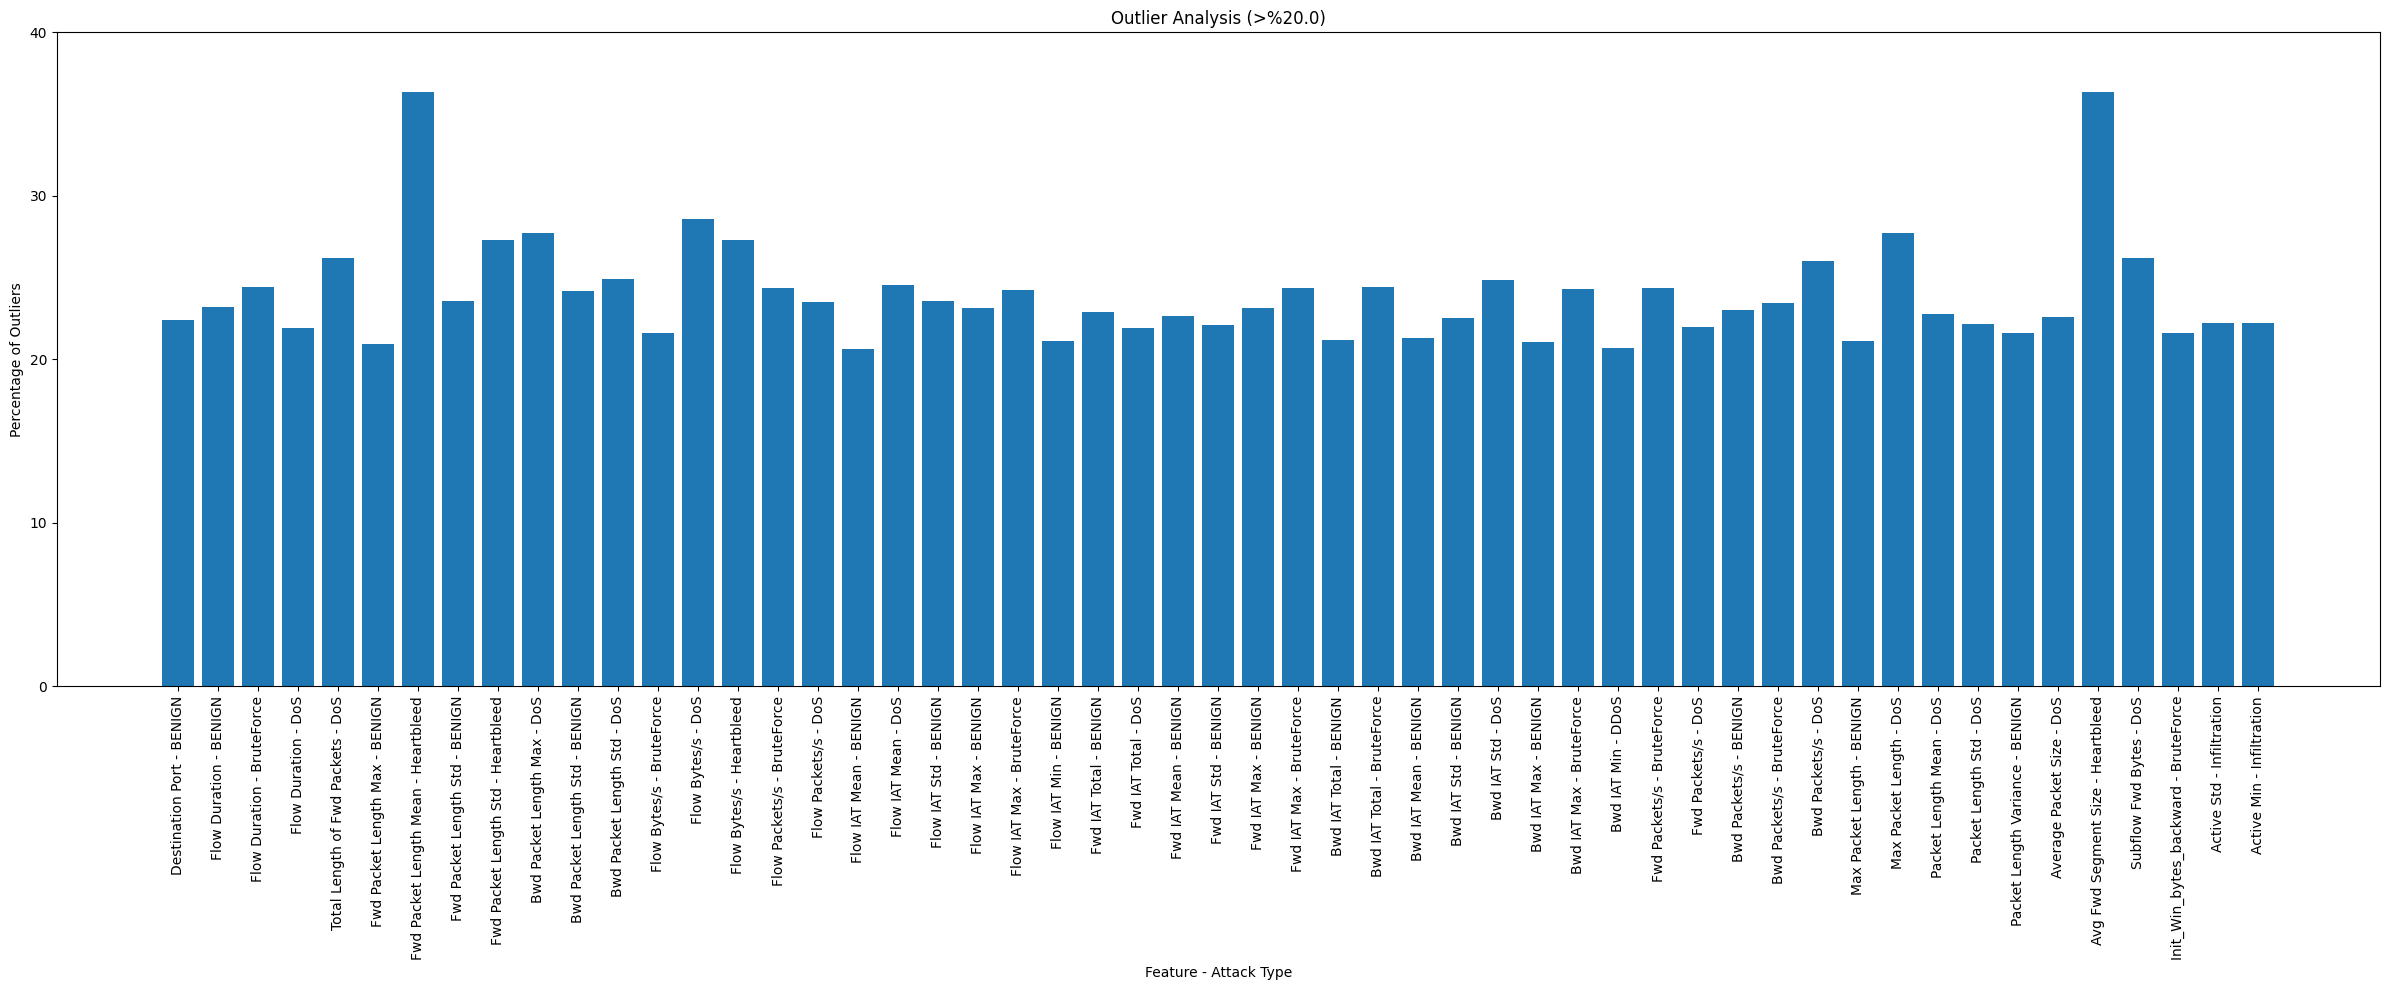

In [47]:
# Inspect outliers overall and grouped by attack type
overall_stats, group_stats = data.inspect_outliers(
    df=data.df,
    iqr_mult=1.5,
    sort_by="percentage",
    ascending=False,
    top_n=None,
    group_by="Attack Type",
    return_group_stats=True,
    plot=True,
)

The feature histograms and the outlier analysis give us important clues about which scaling method is appropriate. We observe the following characteristics:

- features with very different scales
- a large number of outliers
- many values clustered near or around zero
- a generally very large dataset

These observations suggest that StandardScaler is the most suitable choice.
For instance, using a MinMaxScaler on features with extremely different scales would compress most values into a very narrow range, causing the model to lose useful variation.
Likewise, applying a normalization method would make the data heavily influenced by individual outliers, since each sample would be scaled independently.

Therefore, StandardScaler provides a more stable and meaningful transformation for this dataset.

In [48]:
# Inspect distribution of "Attack Type" target column
attack_stats = data.inspect_column(
    column="Attack Type",
    df=data.df,
    dropna=False,
    top_n=None,
    print_result=True,
)


=== Column inspection: 'Attack Type' ===
                Count  Percentage
Attack Type                      
BENIGN        2096484       83.12
DoS            193748        7.68
DDoS           128016        5.08
PortScan        90819        3.60
BruteForce       9152        0.36
WebAttack        2143        0.08
Bot              1953        0.08
Infiltration       36        0.00
Heartbleed         11        0.00


In [ ]:
# Show which features are most important for each attack type
for attack_type in data.df['Attack Type'].unique():
    attack_data = data.df[data.df['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()



The charts above do not directly determine how the data should be preprocessed. However, they play an important role in the later modelling steps, as they reveal which features may be particularly relevant for distinguishing certain attack types. This insight helps guide feature selection and supports a more targeted model development process.

Features may be important for distinguishing attack types if:

- they show distinct median shifts across different attack categories
- they exhibit clearly separated interquartile ranges between classes
- they contain class-specific outliers that indicate unique behavioural patterns
- they show reduced overlap between boxplot distributions of different attack types
- they display consistent variance differences that correlate with certain attack classes

In [ ]:
data.inspect()

In [49]:
data.df.to_csv("../output/EDA.csv", index=False)

At this stage, the exploratory data analysis is complete, and we store the current dataset as a checkpoint. This version will serve as the foundation for the subsequent preprocessing steps.